In [1]:
import pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
email_df_ebu = pd.read_csv('dataset/clean_enron_emails.csv')

In [ ]:
email_df_ebu.info()

In [ ]:
email_df_ebu.describe()

In [21]:
# email: count
def keep_count(receivers, diction, shift=False):
    if not shift:
        for i in receivers:
            diction.setdefault(i, 0)
            diction[i] += 1
    else:
        diction.setdefault(receivers, 0)
        diction[receivers] += 1
    return

In [20]:
receivers = email_df_ebu['to']
senders = email_df_ebu['from']

In [22]:
# top receivers
# email_receivers_rank = []
# files = []
all_receivers = {}
receiver_groups = {}  # some emails are sent to a particular group of people

for receiver in receivers:
    receiver_split = receiver.split(',')
    # email_receivers_rank.append(len(receiver_split))
    # mask = email_df_ebu['to'] == receiver
    # files.append(email_df_ebu[mask]['file'].tolist()[0])

    keep_count(receiver_split, all_receivers)
    keep_count(receiver, receiver_groups, shift=True)

In [ ]:
# print(email_receivers_rank)
# print(files)
# print(all_receivers)

In [23]:
# top senders
all_senders = {}
keep_count(senders, all_senders)

In [24]:
all_senders_sorted = dict(sorted(all_senders.items(), key=lambda item: item[1], reverse=True))
all_receivers_sorted = dict(sorted(all_receivers.items(), key=lambda item: item[1], reverse=True))
receiver_groups_sorted = dict(sorted(receiver_groups.items(), key=lambda item: item[1], reverse=True))

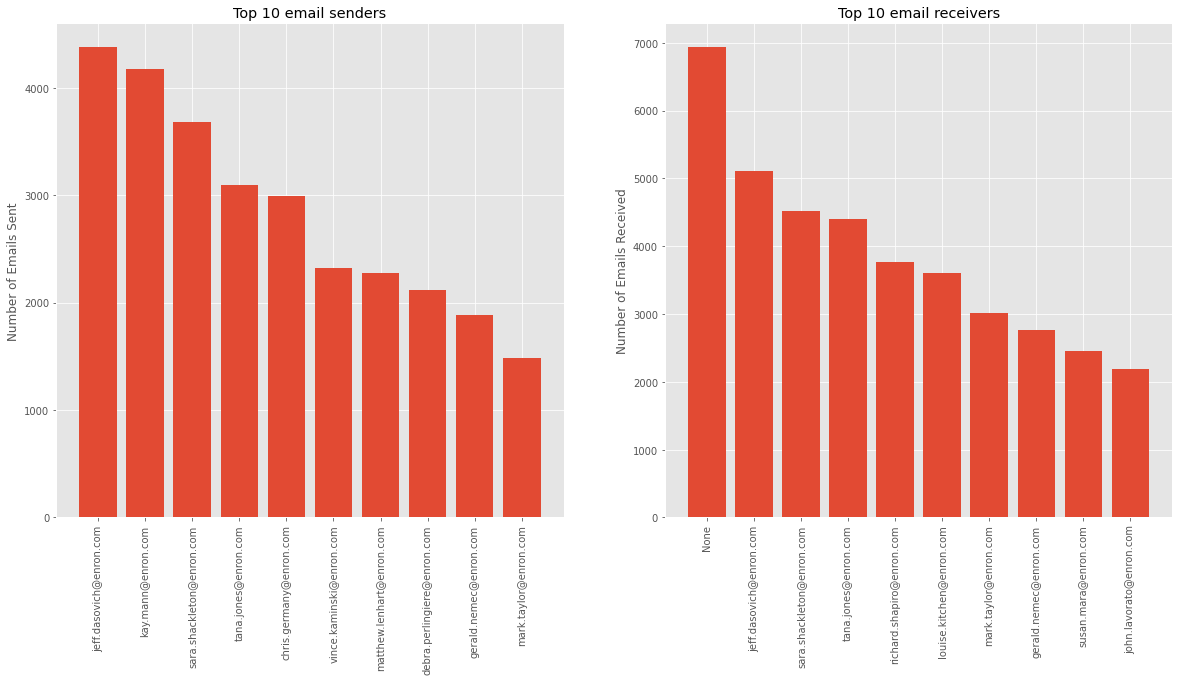

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=[20,20])
top = 10

# top 10 email senders descending order
x = list(all_senders_sorted.keys())[:top]
y = list(all_senders_sorted.values())[:top]
plt.subplot(2, 2, 1)
plt.bar(x, y)
plt.ylabel('Number of Emails Sent')
plt.title(f'Top {top} email senders')
plt.xticks(rotation=90)

# top 10 email receivers descending order
x_r = list(all_receivers_sorted.keys())[:top]
y_r = list(all_receivers_sorted.values())[:top]
plt.subplot(2, 2, 2)
plt.bar(x_r, y_r)
plt.ylabel('Number of Emails Received')
plt.title(f'Top {top} email receivers')
plt.xticks(rotation=90)

plt.show()


In [ ]:
# top receiver groups
x_r = list(receiver_groups_sorted.keys())[:top]
y_r = list(receiver_groups_sorted.values())[:top]
plt.figure(figsize=[20,20])
plt.subplot(2, 2, 2)
plt.bar(x_r, y_r)
plt.ylabel('Number of Email Receiver groups')
plt.title('Top 10 email receivers')
plt.xticks(rotation=90)
plt.show()

In [ ]:
email_df_ebu.head()

In [ ]:
# shuffle data and divide it
# one part for testing the model in production (1/10)
# one part for training, testing and validation

In [4]:
# declear seeds for reproducibility
SHUFFLE_RAND = 3
PROD_RAND = 13
PROD_FRAC = 0.1  # 0.1 of dataset for testing in production

In [5]:
dataset_shuffled = email_df_ebu.sample(frac=1, random_state=SHUFFLE_RAND).reset_index()
dataset_shuffled.head()

,index,file,date,subject,from,to,email_body
0,81738,kean___s__ebr_6,"Tue, 6 Feb 2001 05:18:00 -0800 (PST)",Corporate Staff Functions Presentation,katrina.burton@enron.com,steven.kean@enron.com,i am currently working on the two slides given...
1,144034,scholtes___d__stf__current_issues_21,"Mon, 8 Oct 2001 13:24:59 -0700 (PDT)",FW: WSCC Tagging practices,bharsh@puget.com,"'hackney@enron.com,mhackney@apsc.com,'grow@enr...",okay our exchanges of email were suppose to im...
2,28494,dasovich___j__notes_inbox_5164,"Wed, 28 Feb 2001 02:46:00 -0800 (PST)",FINAL MEMO,james.steffes@enron.com,jeff.dasovich@enron.com,here is the final jim
3,163534,skilling___j__inbox_361,"Wed, 23 May 2001 11:21:15 -0700 (PDT)",Life Insurance Premium Payment,khuber@hcmwealth.com,arkskilling@hotmail.com,mark you are a couple of days ahead of me you ...
4,145472,scott___s__deleted_items_160,"Fri, 25 Jan 2002 15:06:39 -0800 (PST)",Cards so funny you'll choke!From Egreetings.com,whatsup@1.maildb.egreetings.com,sscott5@enron.com,get a free tide kick plus a off coupon for tid...


In [6]:
train_test, prod = train_test_split(dataset_shuffled, test_size=0.1)

In [7]:
train_test.shape

(179324, 7)

In [14]:
prod.shape

(19925, 3)

In [13]:
prod.head()

,file,from,email_body
64897,taylor___m__online_trading_167,dale.neuner@enron.com,hows this a us jet kerosene financial swap tra...
84723,campbell___l__sent_7,larry.campbell@enron.com,approval was received from the texas railroad ...
94830,love___p__sent_items_299,m..love@enron.com,do not suspend this cpid because we have physi...
41038,kitchen___l___americas__esvl_517,kenny.foo@ngx.com,we were dealing with mr lavorato prior to your...
102320,kean___s__sent_168,steven.kean@enron.com,what about the show cause order route


In [12]:
# prod.drop(columns=['index', 'date', 'to'], inplace=True)
prod.drop(columns=['subject'], inplace=True)

In [15]:
train_test.drop(columns=['index', 'date', 'to', 'subject'], inplace=True)

In [16]:
train_test.head()

,file,from,email_body
162026,dorland___c__sent_413,chris.dorland@enron.com,dianne can you break out buys and sells separa...
56662,kean___s__environmental_issues_27,michael.terraso@enron.com,dabhol power water oilnaphtha contamination co...
95949,kaminski___v__discussion_threads_1111,julie@lacima.co.uk,habiba thanks for this but i havent heard a pe...
190598,blair___l__inbox_118,mbellido@southerngas.org,to energy accountingmarket services conference...
35401,parks___j__deleted_items_619,chet_fenner@bmc.com,i am out of the office tues feb and wed feb fo...


In [17]:
prod.to_csv('dataset/production_test_emails.csv', index=False)
train_test.to_csv('dataset/train_test_emails.csv', index=False)

In [18]:
prod.describe()

,file,from,email_body
count,19925,19925,19925
unique,19925,5164,19925
top,taylor___m__online_trading_167,jeff.dasovich@enron.com,hows this a us jet kerosene financial swap tra...
freq,1,429,1


In [19]:
train_test.describe()

,file,from,email_body
count,179324,179324,179324
unique,179324,18120,179324
top,dorland___c__sent_413,jeff.dasovich@enron.com,dianne can you break out buys and sells separa...
freq,1,3951,1
